# Regression

In [1]:
import torch 
import matplotlib.pyplot as plt

[28458.83984375, 12261.189453125, 5443.95458984375, 2574.723388671875, 1367.118896484375, 858.8562622070312, 644.9304809570312, 554.8838500976562, 516.97607421875, 501.0118713378906, 494.283203125, 491.441650390625, 490.2364196777344, 489.7193298339844, 489.4923400878906, 489.3873596191406, 489.33349609375, 489.3016052246094, 489.2781677246094, 489.259033203125, 489.24127197265625, 489.224609375, 489.2081604003906, 489.19158935546875, 489.17535400390625, 489.15911865234375, 489.14288330078125, 489.126220703125, 489.1097106933594, 489.0936584472656, 489.077392578125, 489.0608825683594, 489.04486083984375, 489.02850341796875, 489.01226806640625, 488.99609375, 488.98004150390625, 488.96331787109375, 488.947509765625, 488.93109130859375, 488.9150390625, 488.89898681640625, 488.8829040527344, 488.8666076660156, 488.850341796875, 488.83428955078125, 488.81805419921875, 488.80224609375, 488.7861328125, 488.77008056640625, 488.75384521484375, 488.73797607421875, 488.721923828125, 488.705902099

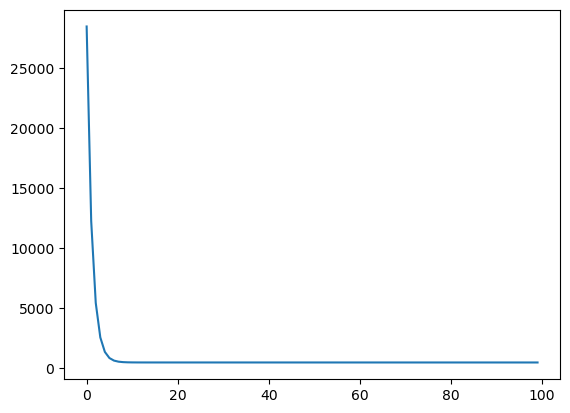

In [6]:
class regressionmodel:
    def __init__(self):
        self.w = torch.randn([1],requires_grad = True)
        self.b = torch.randn([1],requires_grad = True)
        
    def forward(self,x):
        return self.w*x + self.b
    
    def update(self):
        self.w -= self.w.grad*lr
        self.b -=self.b.grad*lr
    
    def reset(self):
        self.w.grad.zero_()
        self.b.grad.zero_()
    
    def lossfn(self,yp,y):
        return (yp-y)**2

x = torch.tensor([5.0, 7.0, 12.0, 16.0, 20.0])
y = torch.tensor([40.0, 120.0, 180.0, 210.0, 240.0])
lr = torch.tensor([0.001])
model = regressionmodel()
losslist = []
for epoch in range(100):
    loss = 0
    for i in range(len(x)):
        yp = model.forward(x[i])
        loss+=model.lossfn(yp,y[i])
    loss/=len(x)
    losslist.append(loss.item())
    loss.backward()
    
    with torch.no_grad():
        model.update()
        
    model.reset()

print(losslist)
plt.plot(losslist)
    

In [5]:
import torch

class RegressionModel:
    def __init__(self):
        self.w = torch.randn([1], requires_grad=True)
        self.b = torch.randn([1], requires_grad=True)

    def forward(self, x):
        return self.w * x + self.b

    def update(self, lr):
        self.w.data -= lr * self.w.grad
        self.b.data -= lr * self.b.grad

    def reset(self):
        self.w.grad.zero_()
        self.b.grad.zero_()

    def lossfn(self, yp, y):
        return (yp - y).pow(2).mean()

x = torch.tensor([5.0, 7.0, 12.0, 16.0, 20.0])
y = torch.tensor([40.0, 120.0, 180.0, 210.0, 240.0])
lr = 0.001
model = RegressionModel()
loss_list = []

for epoch in range(100):
    loss = 0
    for i in range(len(x)):
        yp = model.forward(x[i])
        loss += model.lossfn(yp, y[i])
    loss /= len(x)
    loss_list.append(loss.item())
    loss.backward()

    model.update(lr)
    model.reset()

print(loss_list)


[30317.76953125, 13042.8291015625, 5772.1845703125, 2712.124755859375, 1424.204833984375, 882.1395263671875, 653.987060546875, 557.9542236328125, 517.5267333984375, 500.5028381347656, 493.32879638671875, 490.30047607421875, 489.0166931152344, 488.467529296875, 488.2273864746094, 488.1170959472656, 488.0616149902344, 488.0293884277344, 488.00701904296875, 487.98846435546875, 487.9715881347656, 487.9557189941406, 487.9398498535156, 487.9244689941406, 487.90863037109375, 487.8935546875, 487.87811279296875, 487.8624572753906, 487.84722900390625, 487.8316955566406, 487.81591796875, 487.8008728027344, 487.78546142578125, 487.7701721191406, 487.7547912597656, 487.739013671875, 487.72412109375, 487.7086486816406, 487.69305419921875, 487.67803955078125, 487.66278076171875, 487.64739990234375, 487.63214111328125, 487.61724853515625, 487.6016540527344, 487.58642578125, 487.5709533691406, 487.55621337890625, 487.54071044921875, 487.52569580078125, 487.51031494140625, 487.49542236328125, 487.480133

# NN module 

In [17]:
import torch
import torch.nn as nn
import torch.optim as optim

class LinearRegression(nn.Module):
    def __init__(self, learning_rate=0.001):
        super(LinearRegression, self).__init__()
        self.w = torch.randn([1], requires_grad=True)
        self.b = torch.randn([1], requires_grad=True)
        self.optimizer = optim.SGD([self.w, self.b], lr=learning_rate)
        self.criterion = nn.MSELoss()

    def forward(self, x):
        return self.w * x + self.b

    def fit(self, x, y, num_epochs=1000):
        loss_list = []
        for epoch in range(num_epochs):
            self.optimizer.zero_grad()
            preds = self.forward(x)
            loss = self.criterion(preds, y)
            loss.backward()
            loss_list.append(loss.item())
            self.optimizer.step()
        final_preds = (self.w * x + self.b).detach().numpy()
        return loss_list, final_preds

# Example usage:
x = torch.tensor([5.0, 7.0, 12.0, 16.0, 20.0])
y = torch.tensor([40.0, 120.0, 180.0, 210.0, 240.0])

model = LinearRegression()
loss_list, final_preds = model.fit(x, y, num_epochs=1000)

# Print final values of w and b
print("Final value of w:", model.w.item())
print("Final value of b:", model.b.item())
print(loss_list)

Final value of w: 12.806845664978027
Final value of b: 2.789032459259033
[29783.25390625, 12820.517578125, 5681.275390625, 2676.51708984375, 1411.87109375, 879.59912109375, 655.5667724609375, 561.2658081054688, 521.5656127929688, 504.84600830078125, 497.7981872558594, 494.8208923339844, 493.5572204589844, 493.0140686035156, 492.77484130859375, 492.6636657714844, 492.605712890625, 492.5701599121094, 492.5445251464844, 492.52288818359375, 492.5030822753906, 492.4837951660156, 492.46514892578125, 492.44647216796875, 492.4276428222656, 492.408935546875, 492.3907165527344, 492.37164306640625, 492.3534240722656, 492.33441162109375, 492.316162109375, 492.2972106933594, 492.27911376953125, 492.26055908203125, 492.2421875, 492.2235412597656, 492.204833984375, 492.1865234375, 492.1678771972656, 492.1495666503906, 492.13140869140625, 492.1129455566406, 492.0943298339844, 492.07586669921875, 492.05767822265625, 492.0393981933594, 492.02093505859375, 492.00274658203125, 491.9842834472656, 491.96621

# Reg with input dims

In [18]:
import torch
import torch.nn as nn

class TrueLinearRegression(nn.Module):
    def __init__(self, input_dims, learning_rate=0.001):
        super(TrueLinearRegression, self).__init__()
        self.linear = nn.Linear(input_dims, 1)  # Corrected the typo in the linear layer
        self.optimizer = torch.optim.SGD(self.parameters(), lr=learning_rate)
        self.criterion = nn.MSELoss()

    def forward(self, x):
        return self.linear(x)

    def fit(self, x, y, num_epochs=100, plot=True):
        losses = []
        for epoch in range(num_epochs):
            self.optimizer.zero_grad()
            preds = self.forward(x)
            loss = self.criterion(preds, y)
            loss.backward()
            losses.append(loss.item()) 
            self.optimizer.step()

        for name, param in self.named_parameters():
            print(name)
            print(param.data)

# Example usage:
x = torch.tensor([5.0, 7.0, 12.0, 16.0, 20.0], dtype=torch.float32).view(-1, 1)
y = torch.tensor([40.0, 120.0, 180.0, 210.0, 240.0], dtype=torch.float32).view(-1, 1)

model = TrueLinearRegression(input_dims=1)
model.fit(x, y)


linear.weight
tensor([[12.9584]])
linear.bias
tensor([0.5830])


# XOR

XORModel(
  (linear1): Linear(in_features=2, out_features=2, bias=True)
  (activation1): Sigmoid()
  (linear2): Linear(in_features=2, out_features=1, bias=True)
)
Epoch 1000/10000, Loss = 0.27266925573349
Epoch 2000/10000, Loss = 0.27059854939579964
Epoch 3000/10000, Loss = 0.26853587478399277
Epoch 4000/10000, Loss = 0.2639296129345894
Epoch 5000/10000, Loss = 0.22337761893868446
Epoch 6000/10000, Loss = 0.0001427828324267466
Epoch 7000/10000, Loss = 1.2214229627716122e-11
Epoch 8000/10000, Loss = 3.1867841698840493e-12
Epoch 9000/10000, Loss = 3.1867841698840493e-12
Epoch 10000/10000, Loss = 3.1867841698840493e-12
linear1.weight: tensor([[-1.9767,  2.0750],
        [-3.0809,  3.3435]])
linear1.bias: tensor([ 0.7012, -2.5002])
linear2.weight: tensor([[-2.6653,  2.7713]])
linear2.bias: tensor([1.5715])
Input = tensor([0., 1.])
Output = tensor([1.0000], grad_fn=<AddBackward0>)


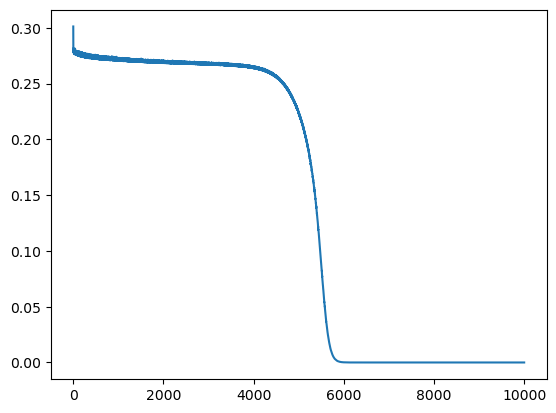

In [20]:
import torch
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn

loss_list = []
torch.manual_seed(42)

x = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float32)
y = torch.tensor([0, 1, 1, 0], dtype=torch.float32)

class XORModel(nn.Module):
    def __init__(self):
        super(XORModel, self).__init__()
        self.linear1 = nn.Linear(2, 2, bias=True)
        self.activation1 = nn.Sigmoid()
        self.linear2 = nn.Linear(2, 1, bias=True)

    def forward(self, x):
        x = self.linear1(x)
        x = self.activation1(x)
        x = self.linear2(x)
        return x

class MyDataset(Dataset):
    def __init__(self, X, Y):
        self.X = X
        self.Y = Y

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.Y[idx]

dataset = MyDataset(x, y)
batch_size = 1
train_data_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = XORModel().to(device)
print(model)
loss_fn = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.03)

def train_one_epoch(epoch_index):
    total_loss = 0
    for i, data in enumerate(train_data_loader):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = loss_fn(outputs.flatten(), labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    return total_loss / (len(train_data_loader) * batch_size)

EPOCHS = 10000
for epoch in range(1, EPOCHS + 1):
    model.train(True)
    avg_loss = train_one_epoch(epoch)
    loss_list.append(avg_loss)
    if epoch % 1000 == 0:
        print(f"Epoch {epoch}/{EPOCHS}, Loss = {avg_loss}")

# Print weights and biases
for name, param in model.named_parameters():
    print(f"{name}: {param.data}")

input_data = torch.tensor([0., 1.]).to(device)
model.eval()
print("Input =", input_data)
print("Output =", model(input_data))

plt.plot(loss_list)
plt.show()

In [21]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transform
from torchvision.transforms import ToTensor
import torchvision.datasets as datasets
from torch.utils.data import Dataset,DataLoader

class CNNClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(nn.Conv2d(1,64,3),
                                 nn.ReLU(),
                                 nn.MaxPool2d((2,2),stride=2),
                                 nn.Conv2d(64,128,3),
                                 nn.ReLU(),
                                 nn.MaxPool2d((2,2),stride=2),
                                 nn.Conv2d(128,64,3),
                                 nn.ReLU(),
                                 nn.MaxPool2d((2,2),stride=2),
                                )
        self.classification_head = nn.Sequential(nn.Linear(64,20,bias=True),
                                                 nn.ReLU(),
                                                 nn.Linear(20,10,bias=True),)
        
    def forward(self,x):
        features = self.net(x)
        return self.classification_head(features.view(batch_size,-1))

mnist_trainset = datasets.MNIST(root="./data",download = True,train=True,transform=ToTensor())
train_loader = DataLoader(mnist_trainset,batch_size=50,shuffle=True)
mnist_testset = datasets.MNIST(root="./data",download = True,train=False,transform=ToTensor())
test_loader = DataLoader(mnist_testset,batch_size=50,shuffle=True)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = CNNClassifier().to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)
batch_size=50

total_params = 0
for name,param in model.named_parameters():
    params = param.numel()
    total_params += params

for epoch in range(6):  
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data[0].to(device), data[1].to(device)

        optimizer.zero_grad()

        outputs = model(inputs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 100 == 99:  
            print('[%d, %5d] loss: %.3f' %(epoch + 1, i + 1, running_loss / 100))
            running_loss = 0.0

print(f"Finished Training. Final loss = {loss.item()}, Total params = {total_params}")

correct,total = 0,0
for i,vdata in enumerate(test_loader):
    tinputs,tlabels = vdata[0].to(device), vdata[1].to(device)
    toutputs = model(tinputs)

    _,predicted = torch.max(toutputs,1)
    total += tlabels.size(0)
    correct += (predicted==tlabels).sum()
        
print(f"Correct = {correct}, Total = {total}")

100%|██████████| 9912422/9912422 [00:04<00:00, 2168691.37it/s]


Extracting ./data\MNIST\raw\train-images-idx3-ubyte.gz to ./data\MNIST\raw



100%|██████████| 28881/28881 [00:00<00:00, 7884898.38it/s]


Extracting ./data\MNIST\raw\train-labels-idx1-ubyte.gz to ./data\MNIST\raw



100%|██████████| 1648877/1648877 [00:00<00:00, 2295657.67it/s]


Extracting ./data\MNIST\raw\t10k-images-idx3-ubyte.gz to ./data\MNIST\raw



100%|██████████| 4542/4542 [00:00<?, ?it/s]

Extracting ./data\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\MNIST\raw



[1,   100] loss: 2.305
[1,   200] loss: 2.295
[1,   300] loss: 2.287
[1,   400] loss: 2.276
[1,   500] loss: 2.249
[1,   600] loss: 2.198
[1,   700] loss: 2.095
[1,   800] loss: 1.908
[1,   900] loss: 1.650
[1,  1000] loss: 1.370


KeyboardInterrupt: 